In [62]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [63]:
df=pd.read_csv('D:/Python Projects/Clustering/K-Means/income.csv')

In [64]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


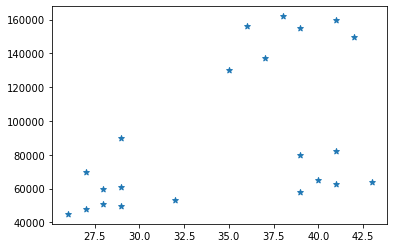

In [65]:
plt.scatter(df['Age'],df['Income($)'],marker="*")

In [66]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [67]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [68]:
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [69]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


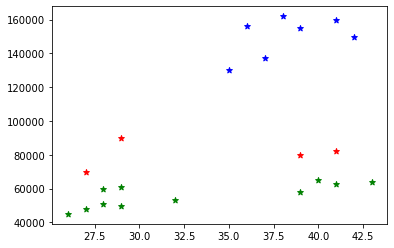

In [70]:
df0=df[df.cluster == 0]
df1=df[df.cluster == 1]
df2=df[df.cluster == 2]
plt.scatter(df0.Age, df0['Income($)'], marker="*", color="blue")
plt.scatter(df1.Age, df1['Income($)'], marker="*", color="red")
plt.scatter(df2.Age, df2['Income($)'], marker="*", color="green")

In [71]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [72]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [73]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [74]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [75]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

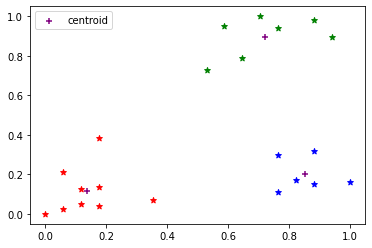

In [76]:
df0=df[df.cluster == 0]
df1=df[df.cluster == 1]
df2=df[df.cluster == 2]
plt.scatter(df0.Age, df0['Income($)'], marker="*", color="blue")
plt.scatter(df1.Age, df1['Income($)'], marker="*", color="red")
plt.scatter(df2.Age, df2['Income($)'], marker="*", color="green")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker="+",color="purple",label="centroid")
plt.legend()

In [79]:
k_range = range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km=km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\amit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [80]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.2187801089333045,
 0.19123828438441165,
 0.13265419827245162,
 0.10824862283029266]

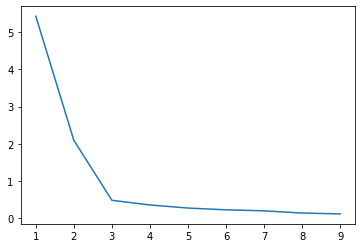

In [82]:
plt.plot(k_range,sse)